In [1]:
import numpy as np
import math
from scipy.linalg import expm

In [2]:
pauli = np.array([[0, -1j],[1j, 0]])

In [3]:
eigvalues, eigvectors = np.linalg.eig(pauli)

In [4]:
eigvalues, eigvectors

(array([ 1.+0.j, -1.+0.j]),
 array([[-0.00000000-0.70710678j,  0.70710678+0.j        ],
        [ 0.70710678+0.j        ,  0.00000000-0.70710678j]]))

In [5]:
np.matmul(pauli, eigvectors[0])

array([ 0.00000000-0.70710678j,  0.70710678+0.j        ])

In [6]:
np.matmul(pauli, eigvectors[1])

array([-0.70710678+0.j        ,  0.00000000+0.70710678j])

In [7]:
reshaper = lambda v: np.expand_dims(v, axis=1)
eigvectors = np.array([reshaper(v) for v in eigvectors])

In [8]:
eigvalues, eigvectors

(array([ 1.+0.j, -1.+0.j]), array([[[-0.00000000-0.70710678j],
         [ 0.70710678+0.j        ]],
 
        [[ 0.70710678+0.j        ],
         [ 0.00000000-0.70710678j]]]))

In [9]:
result = np.zeros((2, 2))
for i in range(eigvectors.shape[0]):
    result = np.add(result, eigvalues[i]*np.matmul(eigvectors[i], np.conj(eigvectors[i].T)))
print(result)

[[ -4.44089210e-16+0.j   0.00000000e+00-1.j]
 [  0.00000000e+00+1.j  -1.66533454e-16+0.j]]


In [10]:
B = np.array([[1/np.sqrt(2), 1j/np.sqrt(2)], [1/np.sqrt(2), -1j/np.sqrt(2)]])

In [11]:
Bdagger = np.matrix(B).getH()

In [12]:
np.matmul(np.matmul(Bdagger, pauli), B)

matrix([[ 0. -2.23711432e-17j, -1. +0.00000000e+00j],
        [-1. +0.00000000e+00j,  0. +2.23711432e-17j]])

In [13]:
np.matmul(np.matmul(B, pauli), B.T)

array([[ 0.+0.j, -1.+0.j],
       [ 1.+0.j,  0.+0.j]])

In [14]:
np.matmul(np.matmul(np.conj(B), pauli), B.T)

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

In [8]:
sigmax = np.array([[0, 1],[1, 0]])

In [9]:
eigvalx, eigvecx = np.linalg.eig(sigmax)

In [10]:
eigvalx, eigvecx

(array([ 1., -1.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

################################################

In [2]:
import matplotlib.pyplot as plt

In [3]:
sigmaz = np.array([[1, 0],[0, -1]])

In [4]:
sigmax = np.array([[0, 1],[1, 0]])

In [5]:
sigmay = np.array([[0, -1j], [1j, 0]])

In [6]:
def psi(B, t, sigma, psi_0):
    u_t = expm(1j*B*sigma*t)
    psi_t = np.matmul(u_t, psi_0)
    return psi_t

In [12]:
avgsx = []
for t in np.arange(0, 10, 0.1):
    psi_t = psi(1, t, sigmay, eigvecx[:, 0].reshape((2, 1)))
    psi_t_dag = np.conjugate(psi_t.T)
    avgsx.append(np.matmul(np.matmul(psi_t_dag, sigmax), psi_t)[0][0])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


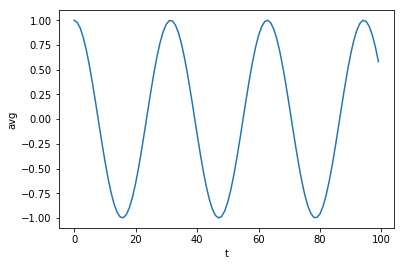

In [13]:
plt.plot(avgsx)
plt.xlabel('t')
plt.ylabel('avg')
plt.show()

In [15]:
avgsy = []
for t in np.arange(0, 10, 0.1):
    psi_t = psi(1, t, sigmay, eigvecx[:, 0].reshape((2, 1)))
    psi_t_dag = np.conjugate(psi_t.T)
    avgsy.append(np.matmul(np.matmul(psi_t_dag, sigmay), psi_t)[0][0])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


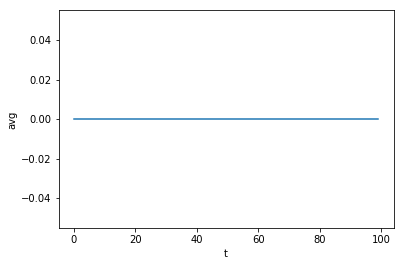

In [16]:
plt.plot(avgsy)
plt.xlabel('t')
plt.ylabel('avg')
plt.show()

In [17]:
avgsz = []
for t in np.arange(0, 10, 0.1):
    psi_t = psi(1, t, sigmay, eigvecx[:, 0].reshape((2, 1)))
    psi_t_dag = np.conjugate(psi_t.T)
    avgsz.append(np.matmul(np.matmul(psi_t_dag, sigmaz), psi_t)[0][0])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


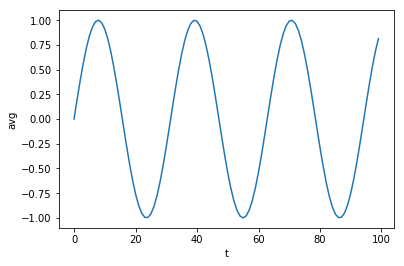

In [18]:
plt.plot(avgsz)
plt.xlabel('t')
plt.ylabel('avg')
plt.show()

In [69]:
from mpl_toolkits.mplot3d import Axes3D

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [86]:
for i in range(100):
    ax.scatter(avgsx[i].real, avgsy[i].real, avgsz[i].real)

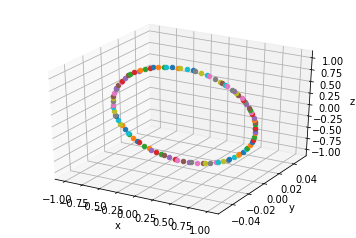

In [87]:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()